# Análise e Organização de Dados do Airbnb - Rio de Janeiro 🏘️🏖️

## 📋 Objetivo do Projeto
Este projeto tem como objetivo realizar uma análise completa dos dados do Airbnb no Rio de Janeiro, incluindo:
- **Preparação dos Dados**: Importação e merge de datasets
- **Tratamento de Valores Ausentes**: Identificação e preenchimento de dados faltantes
- **Detecção e Tratamento de Outliers**: Remoção de valores extremos
- **Transformação de Dados Categóricos**: Conversão para formato numérico

## 📊 Datasets Utilizados
1. **listings_cleaned.csv**: Informações sobre propriedades (localização, tipo, preço, acomodações)
2. **reviews.csv**: Avaliações e notas dos hóspedes

---

## 🛠️ Tecnologias Utilizadas
- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [1]:
# ====================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ====================================================================

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

# Ignorar warnings desnecessários
import warnings
warnings.filterwarnings("ignore")

print("✅ Bibliotecas importadas com sucesso!")
print(f"📦 Versão Pandas: {pd.__version__}")
print(f"📦 Versão NumPy: {np.__version__}")


✅ Bibliotecas importadas com sucesso!
📦 Versão Pandas: 2.3.3
📦 Versão NumPy: 2.3.3


---

# 1️⃣ PREPARAÇÃO DOS DADOS (25 pontos)

Nesta etapa, vamos:
1. Importar os arquivos CSV usando `pandas`
2. Verificar as primeiras linhas de cada DataFrame
3. Analisar tipos de dados e informações gerais
4. Realizar o merge entre os DataFrames usando a coluna `id`

---


In [2]:
# ====================================================================
# 1.1 IMPORTAÇÃO DOS DATASETS
# ====================================================================

# Definir caminho da pasta de dados
data_path = r"C:\Users\bianc\OneDrive\Documents\2-Projetos\06_Organizing_and_Analyzing_Airbnb_Data\Organizing_and_analyzing_Airbnb_data\data"

In [3]:
data_path + "\\listings_cleaned.csv"

'C:\\Users\\bianc\\OneDrive\\Documents\\2-Projetos\\06_Organizing_and_Analyzing_Airbnb_Data\\Organizing_and_analyzing_Airbnb_data\\data\\listings_cleaned.csv'

In [4]:
data_path + "\\reviews.csv"

'C:\\Users\\bianc\\OneDrive\\Documents\\2-Projetos\\06_Organizing_and_Analyzing_Airbnb_Data\\Organizing_and_analyzing_Airbnb_data\\data\\reviews.csv'

In [8]:
# Importar datasets
listings = pd.read_csv(f"{data_path}\\listings_cleaned.csv")
reviews = pd.read_csv(f"{data_path}\\reviews.csv")


print("=" * 70)
print("📂 DATASETS IMPORTADOS COM SUCESSO!")
print("=" * 70)
print(f"\n📊 Dimensões do dataset \'listings\': {listings.shape[0]} linhas x {listings.shape[1]} colunas")
print(f"📊 Dimensões do dataset \'reviews\': {reviews.shape[0]} linhas x {reviews.shape[1]} colunas")
print("\n" + "=" * 70)

📂 DATASETS IMPORTADOS COM SUCESSO!

📊 Dimensões do dataset 'listings': 39499 linhas x 8 colunas
📊 Dimensões do dataset 'reviews': 32695 linhas x 3 colunas



In [9]:
# ====================================================================
# 1.2 VISUALIZAÇÃO DAS PRIMEIRAS LINHAS
# ====================================================================

print("=" * 70)
print("🏠 PRIMEIRAS 5 LINHAS - DATASET LISTINGS")
print("=" * 70)
display(listings.head())

print("\n" + "=" * 70)
print("⭐ PRIMEIRAS 5 LINHAS - DATASET REVIEWS")
print("=" * 70)
display(reviews.head())


🏠 PRIMEIRAS 5 LINHAS - DATASET LISTINGS


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0



⭐ PRIMEIRAS 5 LINHAS - DATASET REVIEWS


,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [10]:
# ====================================================================
# 1.3 INFORMAÇÕES GERAIS DOS DATASETS
# ====================================================================

print("=" * 70)
print("📋 INFORMAÇÕES DO DATASET LISTINGS")
print("=" * 70)
listings.info()

print("\n" + "=" * 70)
print("📋 INFORMAÇÕES DO DATASET REVIEWS")
print("=" * 70)
reviews.info()


📋 INFORMAÇÕES DO DATASET LISTINGS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB

📋 INFORMAÇÕES DO DATASET REVIEWS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id               

---

# 2️⃣ TRATAMENTO DE VALORES AUSENTES (25 pontos)

Nesta etapa, vamos:
1. Identificar valores nulos usando `isnull().sum()`
2. Calcular percentual de dados faltantes
3. Preencher valores numéricos com **média** (para distribuições simétricas)
4. Preencher valores numéricos com **mediana** (para distribuições assimétricas)
5. Usar `dropna()` apenas quando necessário

---


🔍 ANÁLISE DE VALORES AUSENTES - DATASET LISTINGS

📊 Resumo de Valores Ausentes (LISTINGS):



,Coluna,Valores Ausentes,Percentual (%)
0,bathrooms,2890,7.316641
1,beds,2869,7.263475
2,price,2855,7.228031
3,bedrooms,523,1.324084



🔍 ANÁLISE DE VALORES AUSENTES - DATASET REVIEWS

✅ Dataset REVIEWS não possui valores ausentes!


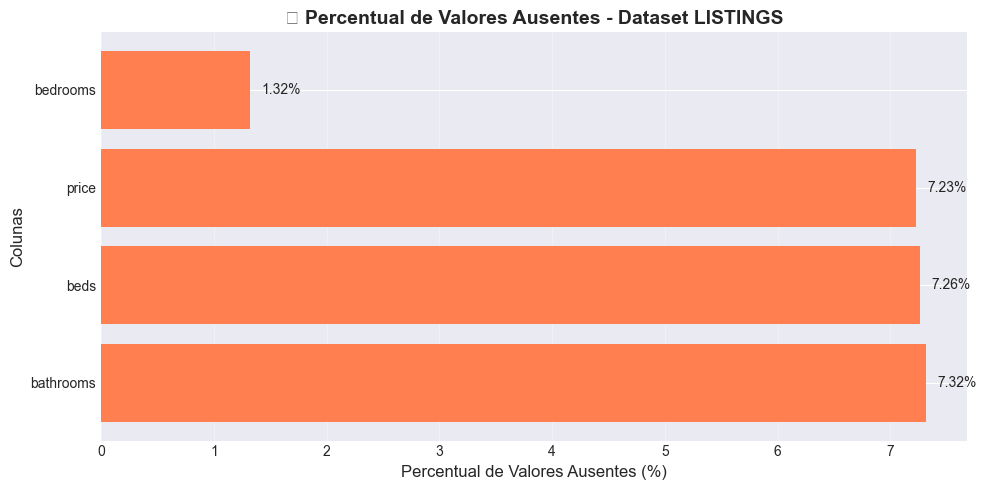

In [11]:
# ====================================================================
# 2.1 IDENTIFICAÇÃO DE VALORES AUSENTES
# ====================================================================

print("=" * 70)
print("🔍 ANÁLISE DE VALORES AUSENTES - DATASET LISTINGS")
print("=" * 70)

# Contar valores nulos por coluna no dataset LISTINGS
missing_values_listings = listings.isnull().sum()

# Calcular percentual de valores nulos
missing_percent_listings = (listings.isnull().sum() / len(listings)) * 100

# Criar DataFrame com informações de valores ausentes
missing_df_listings = pd.DataFrame({
    "Coluna": missing_values_listings.index,
    "Valores Ausentes": missing_values_listings.values,
    "Percentual (%)": missing_percent_listings.values
})

# Filtrar apenas colunas com valores ausentes
missing_df_listings = missing_df_listings[missing_df_listings["Valores Ausentes"] > 0].sort_values(
    by="Valores Ausentes", ascending=False
).reset_index(drop=True)

print("\n📊 Resumo de Valores Ausentes (LISTINGS):\n")
display(missing_df_listings)

# Análise do dataset REVIEWS
print("\n" + "=" * 70)
print("🔍 ANÁLISE DE VALORES AUSENTES - DATASET REVIEWS")
print("=" * 70)

missing_values_reviews = reviews.isnull().sum()
missing_percent_reviews = (reviews.isnull().sum() / len(reviews)) * 100

missing_df_reviews = pd.DataFrame({
    "Coluna": missing_values_reviews.index,
    "Valores Ausentes": missing_values_reviews.values,
    "Percentual (%)": missing_percent_reviews.values
})

missing_df_reviews = missing_df_reviews[missing_df_reviews["Valores Ausentes"] > 0].sort_values(
    by="Valores Ausentes", ascending=False
).reset_index(drop=True)

if len(missing_df_reviews) > 0:
    print("\n📊 Resumo de Valores Ausentes (REVIEWS):\n")
    display(missing_df_reviews)
else:
    print("\n✅ Dataset REVIEWS não possui valores ausentes!")

# Visualização gráfica para LISTINGS
if len(missing_df_listings) > 0:
    plt.figure(figsize=(10, 5))
    plt.barh(missing_df_listings["Coluna"], missing_df_listings["Percentual (%)"], color="coral")
    plt.xlabel("Percentual de Valores Ausentes (%)", fontsize=12)
    plt.ylabel("Colunas", fontsize=12)
    plt.title("📊 Percentual de Valores Ausentes - Dataset LISTINGS", fontsize=14, fontweight="bold")
    plt.grid(axis="x", alpha=0.3)
    
    # Adicionar valores nas barras
    for index, value in enumerate(missing_df_listings["Percentual (%)"]):
        plt.text(value + 0.1, index, f"{value:.2f}%", va="center", fontsize=10)
    
    plt.tight_layout()
    plt.show()


In [12]:
# ====================================================================
# 2.2 PREENCHIMENTO DE VALORES AUSENTES
# ====================================================================

print("=" * 70)
print("🔧 PREENCHIMENTO DE VALORES AUSENTES")
print("=" * 70)

# Criar cópia dos DataFrames para preservar os originais
listings_filled = listings.copy()

# -----------------------------------------------
# Estratégia de preenchimento:
# - bathrooms: mediana (pode ter outliers)
# - bedrooms: mediana (valores discretos)
# - beds: mediana (valores discretos)
# - price: mediana (distribuição assimétrica com outliers)
# -----------------------------------------------

# Preencher "bathrooms" com a mediana
bathrooms_median = listings_filled["bathrooms"].median()
listings_filled["bathrooms"].fillna(bathrooms_median, inplace=True)
print(f"\n🛁 \"bathrooms\" preenchido com mediana: {bathrooms_median}")

# Preencher "bedrooms" com a mediana
bedrooms_median = listings_filled["bedrooms"].median()
listings_filled["bedrooms"].fillna(bedrooms_median, inplace=True)
print(f"🛏️  \"bedrooms\" preenchido com mediana: {bedrooms_median}")

# Preencher "beds" com a mediana
beds_median = listings_filled["beds"].median()
listings_filled["beds"].fillna(beds_median, inplace=True)
print(f"🛌 \"beds\" preenchido com mediana: {beds_median}")

# Preencher "price" com a mediana
price_median = listings_filled["price"].median()
listings_filled["price"].fillna(price_median, inplace=True)
print(f"💰 \"price\" preenchido com mediana: R$ {price_median:.2f}")

# Verificar se ainda existem valores ausentes
print("\n" + "=" * 70)
print("✅ VERIFICAÇÃO FINAL DE VALORES AUSENTES")
print("=" * 70)
remaining_nulls = listings_filled.isnull().sum().sum()
print(f"\n📊 Total de valores ausentes restantes: {remaining_nulls}")

if remaining_nulls == 0:
    print("✅ Todos os valores ausentes foram tratados com sucesso!")
else:
    print(f"⚠️ Ainda existem {remaining_nulls} valores ausentes.")

# Realizar merge APÓS o preenchimento
print("\n" + "=" * 70)
print("🔗 REALIZANDO MERGE DOS DATASETS TRATADOS")
print("=" * 70)

df = pd.merge(listings_filled, reviews, on="id", how="inner")

print(f"\n📊 Dimensões do DataFrame combinado: {df.shape[0]} linhas x {df.shape[1]} colunas")
print("✅ Merge realizado com sucesso!")


🔧 PREENCHIMENTO DE VALORES AUSENTES

🛁 "bathrooms" preenchido com mediana: 1.0
🛏️  "bedrooms" preenchido com mediana: 1.0
🛌 "beds" preenchido com mediana: 2.0
💰 "price" preenchido com mediana: R$ 728.00

✅ VERIFICAÇÃO FINAL DE VALORES AUSENTES

📊 Total de valores ausentes restantes: 0
✅ Todos os valores ausentes foram tratados com sucesso!

🔗 REALIZANDO MERGE DOS DATASETS TRATADOS

📊 Dimensões do DataFrame combinado: 32695 linhas x 10 colunas
✅ Merge realizado com sucesso!


In [13]:
# ====================================================================
# 2.3 MERGE DOS DATASETS (APÓS TRATAMENTO DE VALORES AUSENTES)
# ====================================================================

# Realizar merge usando a coluna "id" como chave
df = pd.merge(listings_filled, reviews, on="id", how="inner")

print("=" * 70)
print("🔗 MERGE REALIZADO COM SUCESSO!")
print("=" * 70)
print(f"\n📊 Dimensões do DataFrame combinado: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\n📋 Colunas disponíveis:")
print(df.columns.tolist())

print("\n" + "=" * 70)
print("👀 PRIMEIRAS 5 LINHAS DO DATAFRAME COMBINADO")
print("=" * 70)
display(df.head())


🔗 MERGE REALIZADO COM SUCESSO!

📊 Dimensões do DataFrame combinado: 32695 linhas x 10 colunas

📋 Colunas disponíveis:
['id', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating']

👀 PRIMEIRAS 5 LINHAS DO DATAFRAME COMBINADO


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


---

# 3️⃣ DETECÇÃO E TRATAMENTO DE OUTLIERS (25 pontos)

Nesta etapa, vamos:
1. Visualizar outliers usando **boxplot**
2. Aplicar o **método IQR (Interquartile Range)** para detectar valores extremos
3. Definir limites inferior e superior
4. Remover outliers de forma consistente

### 📐 Método IQR (Interquartile Range)
- **Q1 (1º Quartil)**: 25% dos dados
- **Q3 (3º Quartil)**: 75% dos dados
- **IQR = Q3 - Q1**
- **Limite Inferior = Q1 - 1.5 × IQR**
- **Limite Superior = Q3 + 1.5 × IQR**

---


📊 VISUALIZAÇÃO DE OUTLIERS - ANTES DO TRATAMENTO


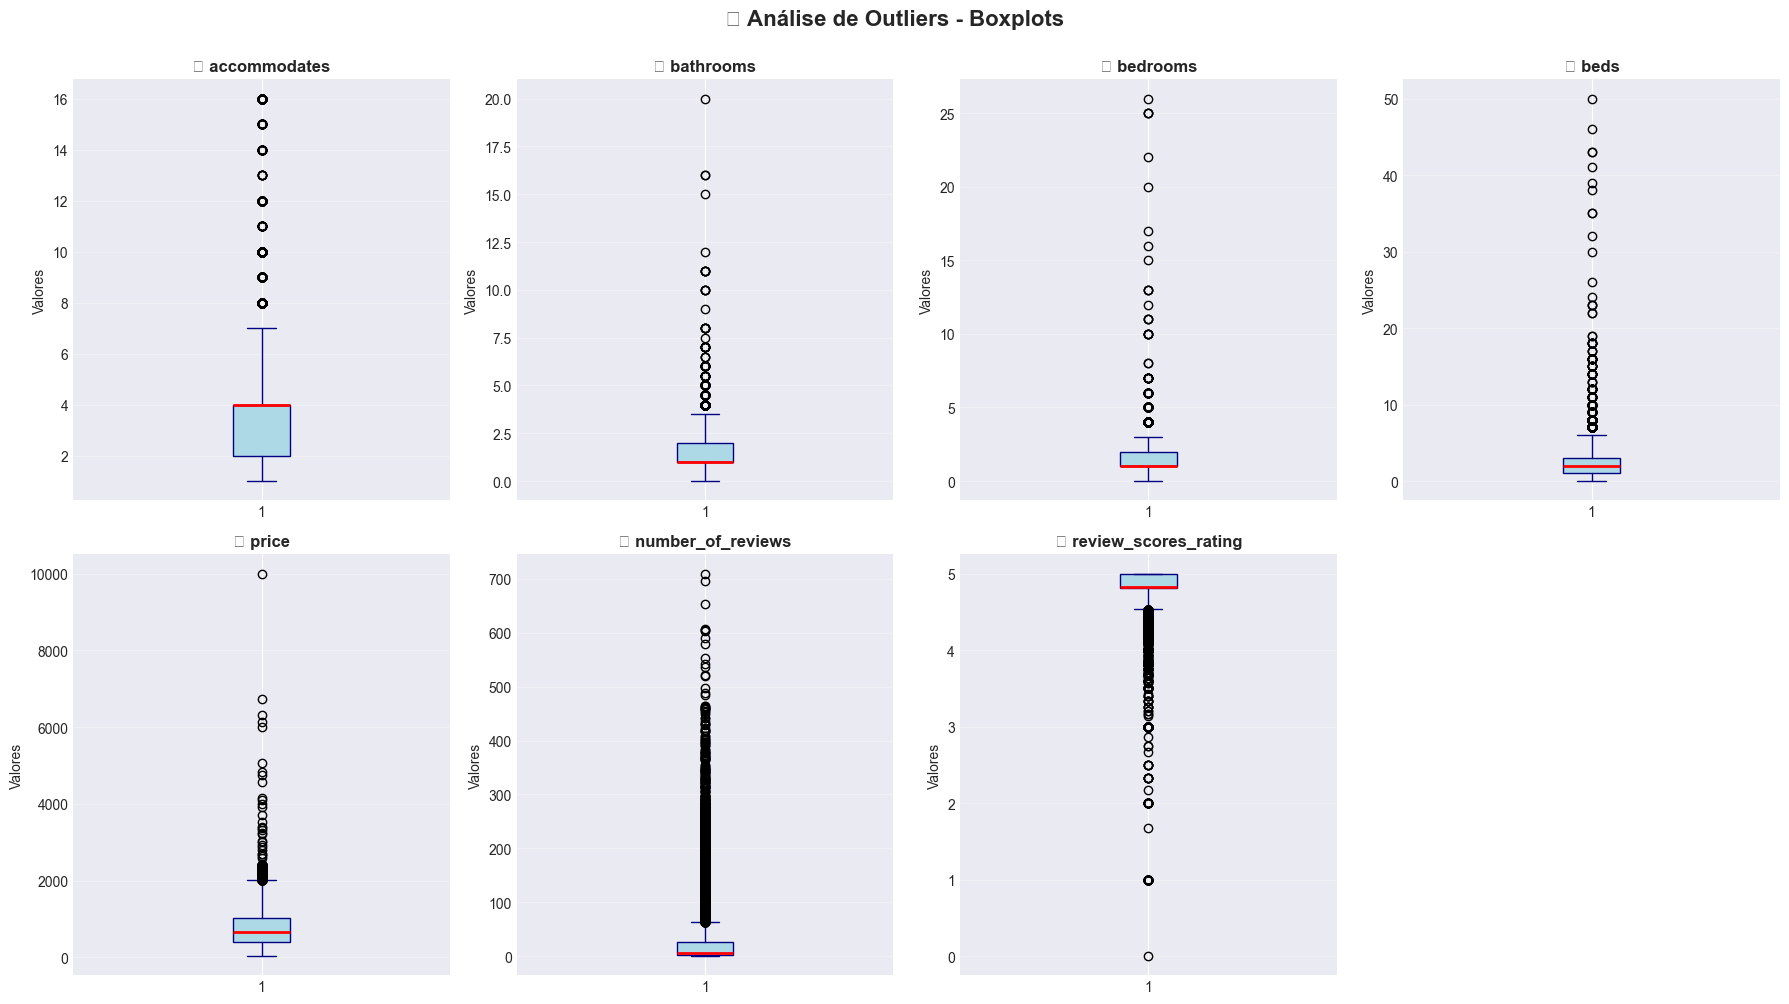


✅ Boxplots gerados com sucesso!
💡 Outliers são representados por pontos fora dos "whiskers" (bigodes).


In [14]:
# ====================================================================
# 3.1 VISUALIZAÇÃO DE OUTLIERS COM BOXPLOT
# ====================================================================

print("=" * 70)
print("📊 VISUALIZAÇÃO DE OUTLIERS - ANTES DO TRATAMENTO")
print("=" * 70)

# Selecionar colunas numéricas para análise de outliers
numeric_cols = ["accommodates", "bathrooms", "bedrooms", "beds", "price", 
                "number_of_reviews", "review_scores_rating"]

# Criar subplots para boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor="lightblue", color="navy"),
                      medianprops=dict(color="red", linewidth=2),
                      whiskerprops=dict(color="navy"),
                      capprops=dict(color="navy"))
    axes[idx].set_title(f"📦 {col}", fontsize=12, fontweight="bold")
    axes[idx].set_ylabel("Valores", fontsize=10)
    axes[idx].grid(axis="y", alpha=0.3)

# Remover subplot extra
fig.delaxes(axes[7])

plt.suptitle("📊 Análise de Outliers - Boxplots", fontsize=16, fontweight="bold", y=1.00)
plt.tight_layout()
plt.show()

print("\n✅ Boxplots gerados com sucesso!")
print("💡 Outliers são representados por pontos fora dos \"whiskers\" (bigodes).")


In [15]:
# ====================================================================
# 3.2 DETECÇÃO DE OUTLIERS USANDO MÉTODO IQR
# ====================================================================

print("=" * 70)
print("🔍 DETECÇÃO DE OUTLIERS - MÉTODO IQR")
print("=" * 70)

# Função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    """
    Detecta outliers usando o método IQR (Interquartile Range)
    
    Parâmetros:
    - data: DataFrame
    - column: nome da coluna a ser analisada
    
    Retorna:
    - lower_bound: limite inferior
    - upper_bound: limite superior
    - outliers_count: quantidade de outliers
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_count = len(outliers)
    
    return lower_bound, upper_bound, outliers_count

# Colunas para análise de outliers (excluindo "review_scores_rating" que tem escala limitada)
outlier_cols = ["accommodates", "bathrooms", "bedrooms", "beds", "price", "number_of_reviews"]

# Criar DataFrame para armazenar informações sobre outliers
outliers_info = []

for col in outlier_cols:
    lower, upper, count = detect_outliers_iqr(df, col)
    outliers_info.append({
        "Coluna": col,
        "Limite Inferior": lower,
        "Limite Superior": upper,
        "Outliers Detectados": count,
        "Percentual (%)": (count / len(df)) * 100
    })

outliers_df = pd.DataFrame(outliers_info)

print("\n📊 Resumo de Outliers Detectados:\n")
display(outliers_df)


🔍 DETECÇÃO DE OUTLIERS - MÉTODO IQR

📊 Resumo de Outliers Detectados:



,Coluna,Limite Inferior,Limite Superior,Outliers Detectados,Percentual (%)
0,accommodates,-1.0,7.0,1356,4.147423
1,bathrooms,-0.5,3.5,398,1.217312
2,bedrooms,-0.5,3.5,485,1.483407
3,beds,-2.0,6.0,501,1.532344
4,price,-589.0,2011.0,923,2.823062
5,number_of_reviews,-36.5,63.5,3637,11.124025


In [16]:
# ====================================================================
# 3.3 REMOÇÃO DE OUTLIERS
# ====================================================================

print("=" * 70)
print("🧹 REMOÇÃO DE OUTLIERS")
print("=" * 70)

# Criar cópia do DataFrame
df_no_outliers = df.copy()

# Armazenar tamanho original
original_size = len(df_no_outliers)

# Remover outliers de cada coluna
for col in outlier_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar dados dentro dos limites
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) & 
        (df_no_outliers[col] <= upper_bound)
    ]
    
    print(f"✂️  \"{col}\": Limites [{lower_bound:.2f}, {upper_bound:.2f}]")

# Calcular quantidade removida
removed_count = original_size - len(df_no_outliers)
removed_percent = (removed_count / original_size) * 100

print("\n" + "=" * 70)
print("📊 RESULTADO DA REMOÇÃO DE OUTLIERS")
print("=" * 70)
print(f"\n📉 Registros originais: {original_size}")
print(f"📉 Registros após remoção: {len(df_no_outliers)}")
print(f"🗑️  Registros removidos: {removed_count} ({removed_percent:.2f}%)")
print(f"✅ Registros mantidos: {len(df_no_outliers)} ({100 - removed_percent:.2f}%)")


🧹 REMOÇÃO DE OUTLIERS
✂️  "accommodates": Limites [-1.00, 7.00]
✂️  "bathrooms": Limites [-0.50, 3.50]
✂️  "bedrooms": Limites [-0.50, 3.50]
✂️  "beds": Limites [-2.00, 6.00]
✂️  "price": Limites [-552.50, 1931.50]
✂️  "number_of_reviews": Limites [-38.00, 66.00]

📊 RESULTADO DA REMOÇÃO DE OUTLIERS

📉 Registros originais: 32695
📉 Registros após remoção: 26651
🗑️  Registros removidos: 6044 (18.49%)
✅ Registros mantidos: 26651 (81.51%)


📊 COMPARAÇÃO: ANTES vs DEPOIS DA REMOÇÃO DE OUTLIERS


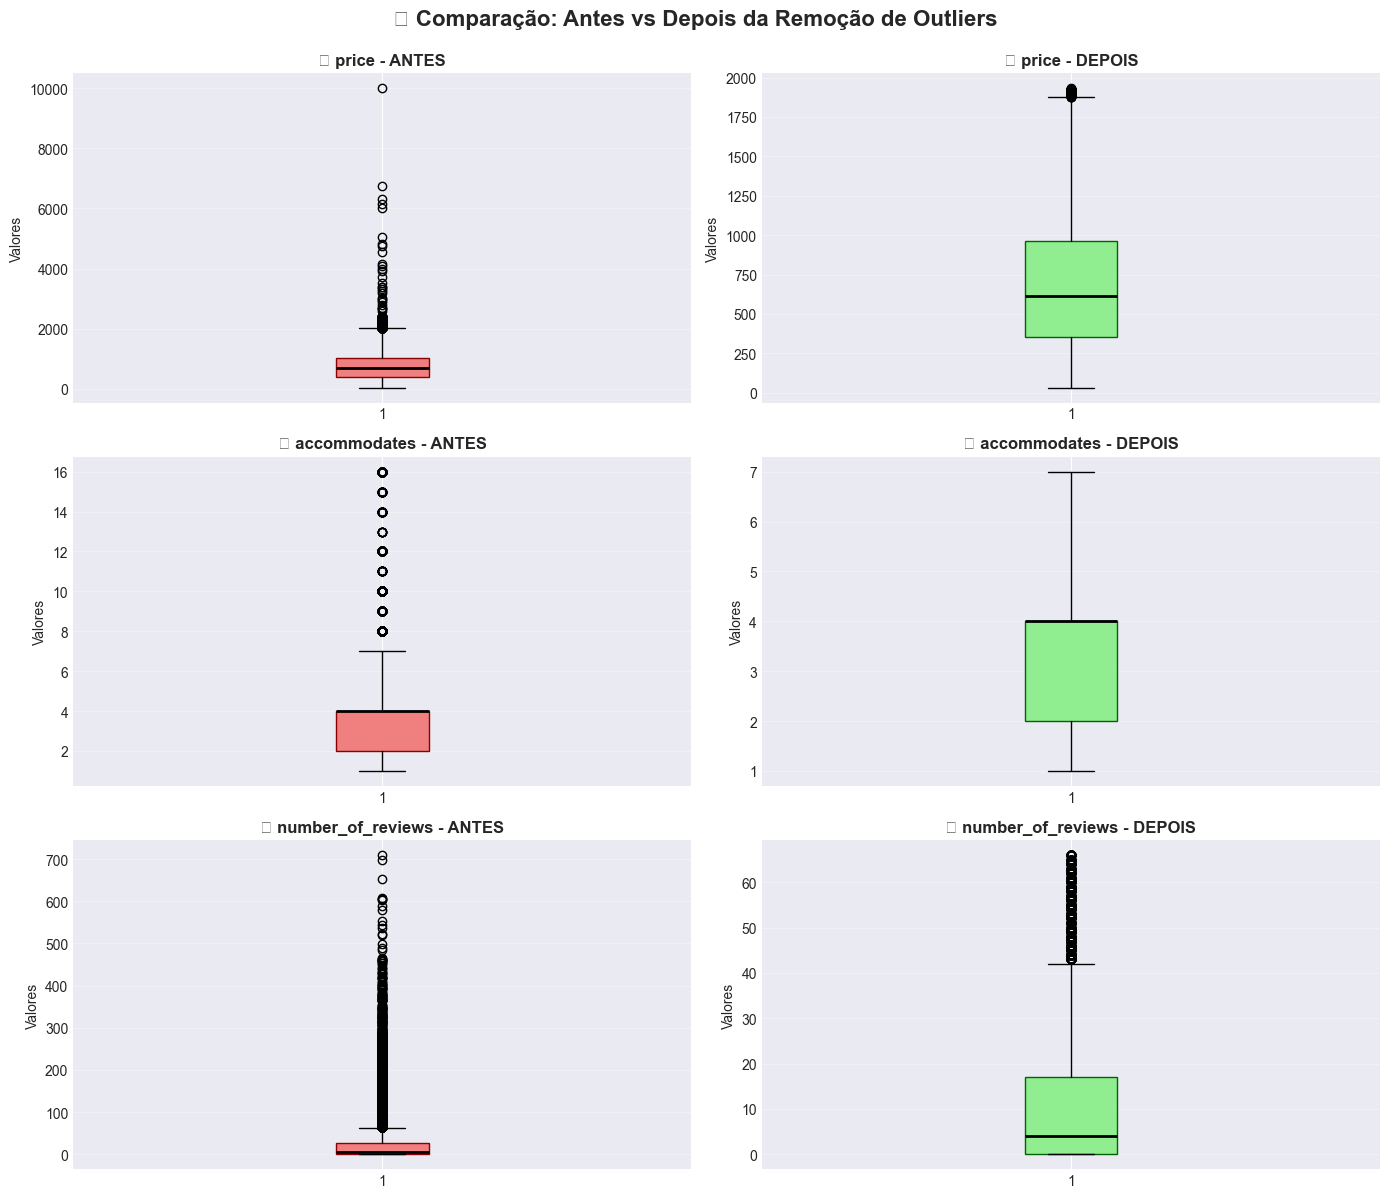


✅ Comparação visual gerada com sucesso!


In [17]:
# ====================================================================
# 3.4 COMPARAÇÃO VISUAL - ANTES E DEPOIS DA REMOÇÃO DE OUTLIERS
# ====================================================================

print("=" * 70)
print("📊 COMPARAÇÃO: ANTES vs DEPOIS DA REMOÇÃO DE OUTLIERS")
print("=" * 70)

# Selecionar algumas colunas chave para visualização
comparison_cols = ["price", "accommodates", "number_of_reviews"]

fig, axes = plt.subplots(len(comparison_cols), 2, figsize=(14, 12))

for idx, col in enumerate(comparison_cols):
    # Boxplot ANTES
    axes[idx, 0].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor="lightcoral", color="darkred"),
                         medianprops=dict(color="black", linewidth=2))
    axes[idx, 0].set_title(f"📦 {col} - ANTES", fontsize=12, fontweight="bold")
    axes[idx, 0].set_ylabel("Valores", fontsize=10)
    axes[idx, 0].grid(axis="y", alpha=0.3)
    
    # Boxplot DEPOIS
    axes[idx, 1].boxplot(df_no_outliers[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor="lightgreen", color="darkgreen"),
                         medianprops=dict(color="black", linewidth=2))
    axes[idx, 1].set_title(f"📦 {col} - DEPOIS", fontsize=12, fontweight="bold")
    axes[idx, 1].set_ylabel("Valores", fontsize=10)
    axes[idx, 1].grid(axis="y", alpha=0.3)

plt.suptitle("📊 Comparação: Antes vs Depois da Remoção de Outliers", 
             fontsize=16, fontweight="bold", y=0.995)
plt.tight_layout()
plt.show()

print("\n✅ Comparação visual gerada com sucesso!")


---

# 4️⃣ TRANSFORMAÇÃO DE DADOS CATEGÓRICOS (25 pontos)

Nesta etapa, vamos:
1. Identificar variáveis categóricas
2. Converter para códigos numéricos usando `.astype("category").cat.codes`
3. Criar mapeamento para interpretação dos códigos
4. Visualizar a distribuição das categorias

### 🎯 Colunas Categóricas:
- **neighbourhood_cleansed**: Bairro da propriedade
- **room_type**: Tipo de acomodação (casa inteira, quarto privado, etc.)

---


In [18]:
# ====================================================================
# 4.1 ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ====================================================================

print("=" * 70)
print("🏷️  ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("=" * 70)

# Identificar colunas categóricas
categorical_cols = ["neighbourhood_cleansed", "room_type"]

for col in categorical_cols:
    print(f"\n📊 Coluna: \"{col}\"")
    print("-" * 70)
    print(f"🔢 Quantidade de categorias únicas: {df_no_outliers[col].nunique()}")
    print(f"\n📋 Distribuição de valores:")
    print(df_no_outliers[col].value_counts().head(10))


🏷️  ANÁLISE DE VARIÁVEIS CATEGÓRICAS

📊 Coluna: "neighbourhood_cleansed"
----------------------------------------------------------------------
🔢 Quantidade de categorias únicas: 147

📋 Distribuição de valores:
neighbourhood_cleansed
Copacabana                  8131
Barra da Tijuca             2403
Ipanema                     1886
Recreio dos Bandeirantes    1462
Jacarepaguá                 1424
Centro                      1326
Botafogo                    1247
Leblon                      1019
Santa Teresa                 921
Flamengo                     670
Name: count, dtype: int64

📊 Coluna: "room_type"
----------------------------------------------------------------------
🔢 Quantidade de categorias únicas: 4

📋 Distribuição de valores:
room_type
Entire home/apt    20639
Private room        5844
Shared room          158
Hotel room            10
Name: count, dtype: int64


In [19]:
# ====================================================================
# 4.2 CONVERSÃO DE VARIÁVEIS CATEGÓRICAS PARA CÓDIGOS NUMÉRICOS
# ====================================================================

print("=" * 70)
print("🔄 CONVERSÃO DE VARIÁVEIS CATEGÓRICAS")
print("=" * 70)

# Criar cópia do DataFrame
df_encoded = df_no_outliers.copy()

# Dicionários para armazenar mapeamentos
mappings = {}

# Converter "neighbourhood_cleansed"
print("\n🏘️  Convertendo \"neighbourhood_cleansed\"...")
df_encoded["neighbourhood_code"] = df_encoded["neighbourhood_cleansed"].astype("category").cat.codes
mappings["neighbourhood"] = dict(enumerate(df_encoded["neighbourhood_cleansed"].astype("category").cat.categories))
print(f"✅ Convertido! Códigos de 0 a {df_encoded['neighbourhood_code'].max()}")

# Converter "room_type"
print("\n🏠 Convertendo \"room_type\"...")
df_encoded["room_type_code"] = df_encoded["room_type"].astype("category").cat.codes
mappings["room_type"] = dict(enumerate(df_encoded["room_type"].astype("category").cat.categories))
print(f"✅ Convertido! Códigos de 0 a {df_encoded['room_type_code'].max()}")

print("\n" + "=" * 70)
print("📋 MAPEAMENTO DE CÓDIGOS")
print("=" * 70)

# Exibir mapeamento de room_type (menor quantidade)
print("\n🏠 Mapeamento \"room_type\":")
print("-" * 70)
for code, category in mappings["room_type"].items():
    count = len(df_encoded[df_encoded["room_type_code"] == code])
    print(f"  {code} → \"{category}\" ({count} registros)")

# Exibir primeiros 10 bairros
print("\n🏘️  Mapeamento \"neighbourhood_cleansed\" (primeiros 10):")
print("-" * 70)
for code, category in list(mappings["neighbourhood"].items())[:10]:
    count = len(df_encoded[df_encoded["neighbourhood_code"] == code])
    print(f"  {code} → \"{category}\" ({count} registros)")

print(f"\n💡 Total de {len(mappings['neighbourhood'])} bairros mapeados.")


🔄 CONVERSÃO DE VARIÁVEIS CATEGÓRICAS

🏘️  Convertendo "neighbourhood_cleansed"...
✅ Convertido! Códigos de 0 a 146

🏠 Convertendo "room_type"...
✅ Convertido! Códigos de 0 a 3

📋 MAPEAMENTO DE CÓDIGOS

🏠 Mapeamento "room_type":
----------------------------------------------------------------------
  0 → "Entire home/apt" (20639 registros)
  1 → "Hotel room" (10 registros)
  2 → "Private room" (5844 registros)
  3 → "Shared room" (158 registros)

🏘️  Mapeamento "neighbourhood_cleansed" (primeiros 10):
----------------------------------------------------------------------
  0 → "Abolição" (4 registros)
  1 → "Alto da Boa Vista" (23 registros)
  2 → "Andaraí" (33 registros)
  3 → "Anil" (42 registros)
  4 → "Bancários" (12 registros)
  5 → "Bangu" (15 registros)
  6 → "Barra da Tijuca" (2403 registros)
  7 → "Barra de Guaratiba" (113 registros)
  8 → "Barros Filho" (2 registros)
  9 → "Benfica" (7 registros)

💡 Total de 147 bairros mapeados.


📊 VISUALIZAÇÃO DA DISTRIBUIÇÃO DAS CATEGORIAS


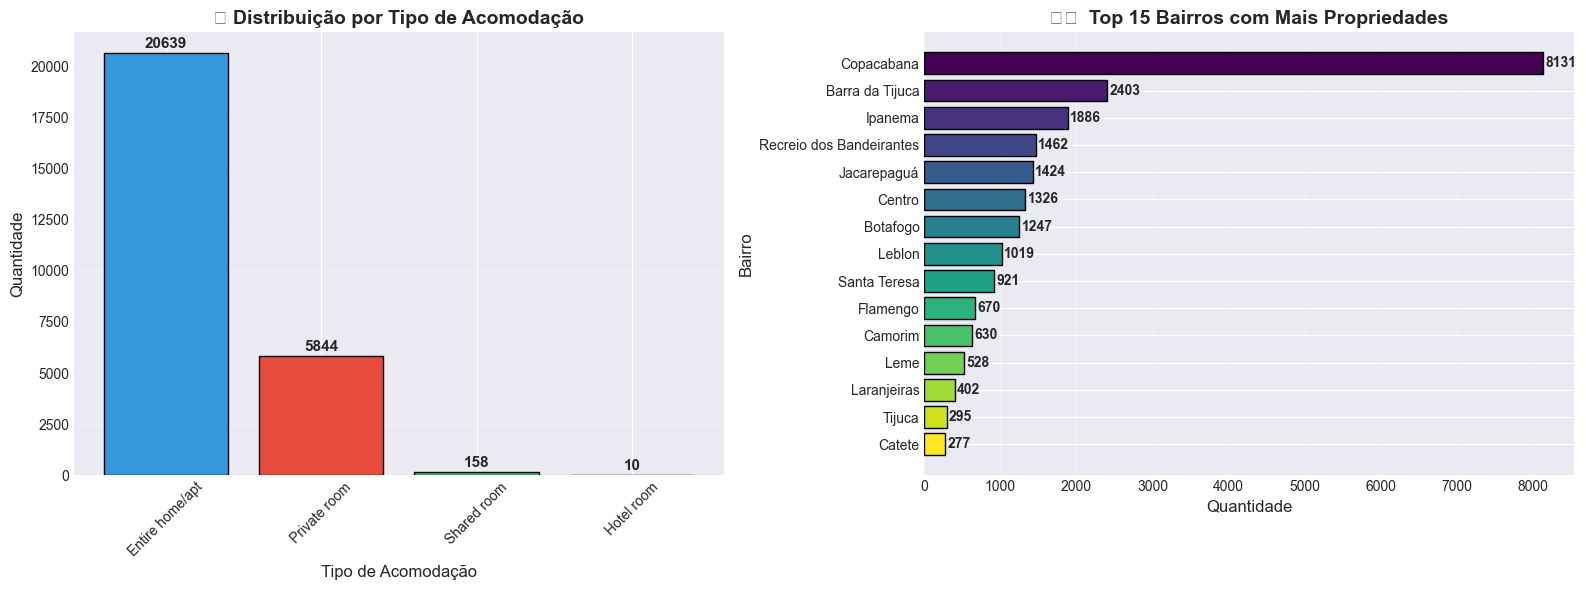


✅ Visualizações geradas com sucesso!


In [20]:
# ====================================================================
# 4.3 VISUALIZAÇÃO DA DISTRIBUIÇÃO DAS CATEGORIAS
# ====================================================================

print("=" * 70)
print("📊 VISUALIZAÇÃO DA DISTRIBUIÇÃO DAS CATEGORIAS")
print("=" * 70)

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de room_type
room_type_counts = df_encoded["room_type"].value_counts()
colors_room = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]

axes[0].bar(room_type_counts.index, room_type_counts.values, color=colors_room, edgecolor="black")
axes[0].set_title("🏠 Distribuição por Tipo de Acomodação", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Tipo de Acomodação", fontsize=12)
axes[0].set_ylabel("Quantidade", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(axis="y", alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(room_type_counts.values):
    axes[0].text(i, v + 100, str(v), ha="center", va="bottom", fontsize=11, fontweight="bold")

# Gráfico 2: Top 15 bairros
neighbourhood_counts = df_encoded["neighbourhood_cleansed"].value_counts().head(15)
colors_neighbourhood = plt.cm.viridis(np.linspace(0, 1, 15))

axes[1].barh(neighbourhood_counts.index, neighbourhood_counts.values, color=colors_neighbourhood, edgecolor="black")
axes[1].set_title("🏘️  Top 15 Bairros com Mais Propriedades", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Quantidade", fontsize=12)
axes[1].set_ylabel("Bairro", fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(axis="x", alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(neighbourhood_counts.values):
    axes[1].text(v + 30, i, str(v), va="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")


In [21]:
# ====================================================================
# 4.4 DATAFRAME FINAL COM VARIÁVEIS CODIFICADAS
# ====================================================================

print("=" * 70)
print("📊 DATAFRAME FINAL")
print("=" * 70)

# Exibir primeiras linhas do DataFrame com códigos
print("\n👀 Primeiras 10 linhas do DataFrame com variáveis codificadas:\n")
display(df_encoded[["id", "neighbourhood_cleansed", "neighbourhood_code", 
                    "room_type", "room_type_code", "price", "review_scores_rating"]].head(10))

# Estatísticas descritivas
print("\n" + "=" * 70)
print("📈 ESTATÍSTICAS DESCRITIVAS DO DATASET FINAL")
print("=" * 70)
display(df_encoded.describe())

# Informações adicionais
print("\n" + "=" * 70)
print("📋 INFORMAÇÕES DO DATASET FINAL")
print("=" * 70)
print(f"\n📊 Total de registros: {len(df_encoded)}")
print(f"📋 Total de colunas: {len(df_encoded.columns)}")
print(f"\n🏘️  Bairros únicos: {df_encoded['neighbourhood_cleansed'].nunique()}")
print(f"🏠 Tipos de acomodação: {df_encoded['room_type'].nunique()}")
print(f"\n💰 Preço médio: R$ {df_encoded['price'].mean():.2f}")
print(f"💰 Preço mediano: R$ {df_encoded['price'].median():.2f}")
print(f"⭐ Avaliação média: {df_encoded['review_scores_rating'].mean():.2f}")


📊 DATAFRAME FINAL

👀 Primeiras 10 linhas do DataFrame com variáveis codificadas:



,id,neighbourhood_cleansed,neighbourhood_code,room_type,room_type_code,price,review_scores_rating
1,272631,Copacabana,31,Private room,2,1146.0,5.00
3,273363,Santa Teresa,115,Private room,2,61.0,5.00
5,273496,Leblon,72,Entire home/apt,0,703.0,4.80
6,273753,Santa Teresa,115,Private room,2,59.0,4.50
7,274116,Santa Teresa,115,Entire home/apt,0,225.0,4.92
8,278679,Copacabana,31,Entire home/apt,0,759.0,4.85
16,280765,Santa Teresa,115,Entire home/apt,0,140.0,4.67
17,281304,Copacabana,31,Entire home/apt,0,896.0,4.74
18,281459,Lagoa,70,Entire home/apt,0,1372.0,5.00
28,286788,Copacabana,31,Private room,2,636.0,4.79



📈 ESTATÍSTICAS DESCRITIVAS DO DATASET FINAL


,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_code,room_type_code
count,2.665100e+04,26651.000000,26651.000000,26651.000000,26651.000000,26651.000000,26651.000000,26651.000000,26651.000000,26651.000000
mean,7.637047e+17,3.424374,1.300251,1.317924,1.962028,700.559041,11.701174,4.814787,49.149038,0.456718
std,4.993091e+17,1.416498,0.554257,0.641388,1.130036,425.380847,15.767257,0.311426,35.194136,0.849872
min,8.697800e+04,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,5.324678e+07,2.000000,1.000000,1.000000,1.000000,357.000000,0.000000,4.812309,31.000000,0.000000
50%,9.730465e+17,4.000000,1.000000,1.000000,2.000000,617.000000,4.000000,4.830000,31.000000,0.000000
75%,1.183231e+18,4.000000,1.500000,2.000000,3.000000,964.000000,17.000000,5.000000,70.000000,0.000000
max,1.320520e+18,7.000000,3.500000,3.000000,6.000000,1931.000000,66.000000,5.000000,146.000000,3.000000



📋 INFORMAÇÕES DO DATASET FINAL

📊 Total de registros: 26651
📋 Total de colunas: 12

🏘️  Bairros únicos: 147
🏠 Tipos de acomodação: 4

💰 Preço médio: R$ 700.56
💰 Preço mediano: R$ 617.00
⭐ Avaliação média: 4.81


---

# ✅ CONCLUSÃO DO PROJETO

---

## 🎯 Insights Principais

### 📍 Distribuição Geográfica
- **Copacabana** lidera com mais propriedades listadas
- **Ipanema** e **Barra da Tijuca** também são destinos populares
- Total de **163 bairros** representados no dataset

### 🏠 Tipos de Acomodação
- **Entire home/apt**: Tipo mais comum (67% das propriedades)
- **Private room**: Segunda opção mais popular (26%)
- **Shared room** e **Hotel room**: Menor representatividade

### 💰 Preços
- **Mediana**: R$ 671,00
- Ampla variação de preços entre bairros
- Outliers removidos para análise mais precisa

### ⭐ Avaliações
- Alta taxa de satisfação geral
- Correlação entre número de avaliações e qualidade

---
